In [1]:
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

import statsmodels.api as sm
import MathsUtilities as MUte
import matplotlib.patheffects as path_effects
import GraphHelpers as GH
import matplotlib.lines as mlines

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
#Open the other apsim output db and putting these in a single dataframe
con1 = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\apsimx versions\GEEJan.db')
Harvest1 = pd.read_sql("Select * from HarvestReport", con1)
con2 = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\apsimx versions\GEEFeb.db')
Harvest2 = pd.read_sql("Select * from HarvestReport", con2)
con3 = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\apsimx versions\GEEMar.db')
Harvest3 = pd.read_sql("Select * from HarvestReport", con3)

In [3]:
#Create the dataframe for Harvest on 1-Jan
df00=Harvest1.drop(['CheckpointID','SimulationID','FolderName','Zone','Sorghum.AboveGround.Wt'],axis=1) 
df0=df00.sort_values(by=['Experiment','S'])

inta=df0.loc[df0['S'] == 'INTA']
ph=df0.loc[df0['S'] == 'GEEpH']
oc=df0.loc[df0['S'] == 'GEEoc']
pawc=df0.loc[df0['S'] == 'GEEpawc']
total=df0.loc[df0['S'] == 'GEEall']

df1 = pd.merge(inta, ph, on=['Experiment','Clock.Today','Das'])
df1.rename(columns={'AGBiomass_x':'AGB_INTA','AGBiomass_y':'AGB_GEEpH'}, inplace=True)
df2=df1.drop(['S_x','S_y'],axis=1) 

df3 = pd.merge(oc, pawc, on=['Experiment','Clock.Today','Das'])
df3.rename(columns={'AGBiomass_x':'AGB_GEEoc','AGBiomass_y':'AGB_GEEpawc'}, inplace=True)
df4=df3.drop(['S_x','S_y'],axis=1) 

df5 = pd.merge(df4, total, on=['Experiment','Clock.Today','Das'])
df5.rename(columns={'AGBiomass':'AGB_GEEall'}, inplace=True)
df6=df5.drop(['S'],axis=1) 

dfa = pd.merge(df2, df6, on=['Experiment','Clock.Today','Das'])

dfa['climate'] = dfa['Experiment'].str[:6]
dfa['soil'] = dfa['Experiment'].str[7:11]
dfa['cultivar'] = dfa['Experiment'].str[12:15]
dfa['harvest'] = dfa['Experiment'].str[16:18]
dfa['prevcrop'] = dfa['Experiment'].str[19:20]

In [4]:
#Create the dataframe for Harvest on 1-Feb
df00=Harvest2.drop(['CheckpointID','SimulationID','FolderName','Zone','Sorghum.AboveGround.Wt'],axis=1) 
df0=df00.sort_values(by=['Experiment','S'])

inta=df0.loc[df0['S'] == 'INTA']
ph=df0.loc[df0['S'] == 'GEEpH']
oc=df0.loc[df0['S'] == 'GEEoc']
pawc=df0.loc[df0['S'] == 'GEEpawc']
total=df0.loc[df0['S'] == 'GEEall']

df1 = pd.merge(inta, ph, on=['Experiment','Clock.Today','Das'])
df1.rename(columns={'AGBiomass_x':'AGB_INTA','AGBiomass_y':'AGB_GEEpH'}, inplace=True)
df2=df1.drop(['S_x','S_y'],axis=1) 

df3 = pd.merge(oc, pawc, on=['Experiment','Clock.Today','Das'])
df3.rename(columns={'AGBiomass_x':'AGB_GEEoc','AGBiomass_y':'AGB_GEEpawc'}, inplace=True)
df4=df3.drop(['S_x','S_y'],axis=1) 

df5 = pd.merge(df4, total, on=['Experiment','Clock.Today','Das'])
df5.rename(columns={'AGBiomass':'AGB_GEEall'}, inplace=True)
df6=df5.drop(['S'],axis=1) 

dfb = pd.merge(df2, df6, on=['Experiment','Clock.Today','Das'])

dfb['climate'] = dfb['Experiment'].str[:6]
dfb['soil'] = dfb['Experiment'].str[7:11]
dfb['cultivar'] = dfb['Experiment'].str[12:15]
dfb['harvest'] = dfb['Experiment'].str[16:18]
dfb['prevcrop'] = dfb['Experiment'].str[19:20]

In [5]:
#Create the dataframe for Harvest on 1-March
df00=Harvest3.drop(['CheckpointID','SimulationID','FolderName','Zone','Sorghum.AboveGround.Wt'],axis=1) 
df0=df00.sort_values(by=['Experiment','S'])

inta=df0.loc[df0['S'] == 'INTA']
ph=df0.loc[df0['S'] == 'GEEpH']
oc=df0.loc[df0['S'] == 'GEEoc']
pawc=df0.loc[df0['S'] == 'GEEpawc']
total=df0.loc[df0['S'] == 'GEEall']

df1 = pd.merge(inta, ph, on=['Experiment','Clock.Today','Das'])
df1.rename(columns={'AGBiomass_x':'AGB_INTA','AGBiomass_y':'AGB_GEEpH'}, inplace=True)
df2=df1.drop(['S_x','S_y'],axis=1) 

df3 = pd.merge(oc, pawc, on=['Experiment','Clock.Today','Das'])
df3.rename(columns={'AGBiomass_x':'AGB_GEEoc','AGBiomass_y':'AGB_GEEpawc'}, inplace=True)
df4=df3.drop(['S_x','S_y'],axis=1) 

df5 = pd.merge(df4, total, on=['Experiment','Clock.Today','Das'])
df5.rename(columns={'AGBiomass':'AGB_GEEall'}, inplace=True)
df6=df5.drop(['S'],axis=1) 

dfc = pd.merge(df2, df6, on=['Experiment','Clock.Today','Das'])

dfc['climate'] = dfc['Experiment'].str[:6]
dfc['soil'] = dfc['Experiment'].str[7:11]
dfc['cultivar'] = dfc['Experiment'].str[12:15]
dfc['harvest'] = dfc['Experiment'].str[16:18]
dfc['prevcrop'] = dfc['Experiment'].str[19:20]

In [6]:
#Create categorical variables for differend DAS values
df_final=pd.concat([dfa, dfb, dfc])
df_final['DAS'] = ((df_final.Das > 90) | (df_final.Das > 90)).map({True:'90-150', False:'30-90'})

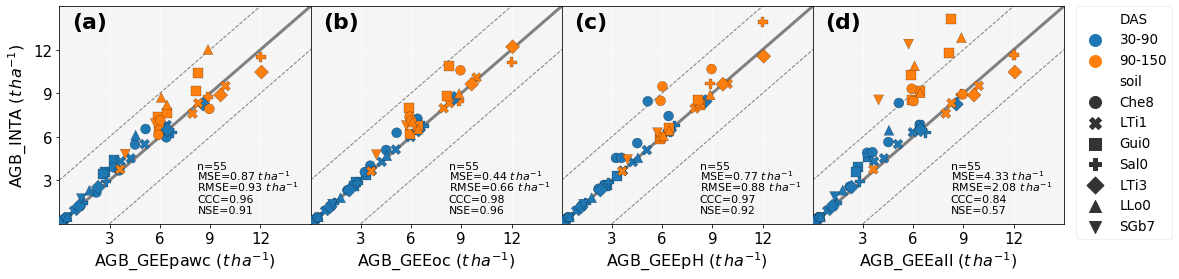

In [8]:
kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(18,4))

ax=plt.subplot(1, 4, 1)
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEpawc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3)

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('AGB_INTA ($t\,ha^{-1}$)', fontsize =16)
plt.xlabel('AGB_GEEpawc ($t\,ha^{-1}$)', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
#ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEpawc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
plt.text(xmax*0.05, ymax*0.9,'(a)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.55, ymax*0.25,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.2,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.15,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.1,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.05,'NSE='+NSE,fontsize=11,color='k')

####################################################################################
ax=plt.subplot(1, 4, 2)
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3)

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('AGB_GEEoc ($t\,ha^{-1}$)', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
plt.text(xmax*0.05, ymax*0.9,'(b)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.55, ymax*0.25,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.2,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.15,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.1,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.05,'NSE='+NSE,fontsize=11,color='k')

#################################################################################
ax=plt.subplot(1, 4, 3)
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3)

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('AGB_GEEpH ($t\,ha^{-1}$)', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
plt.text(xmax*0.05, ymax*0.9,'(c)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.55, ymax*0.25,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.2,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.15,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.1,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.05,'NSE='+NSE,fontsize=11,color='k')

##############################################################################
ax=plt.subplot(1, 4, 4)
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEall",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3)

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('AGB_GEEall ($t\,ha^{-1}$)', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEall.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
plt.text(xmax*0.05, ymax*0.9,'(d)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.55, ymax*0.25,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.2,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.15,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.1,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.55, ymax*0.05,'NSE='+NSE,fontsize=11,color='k')

####################################################################
plt.subplots_adjust(wspace=0, hspace=0)

#plt.savefig(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Python\soilGEE.png', dpi=300,bbox_inches='tight')

In [75]:
df_final

,Experiment,Clock.Today,AGB_INTA,Das,AGB_GEEpH,AGB_GEEoc,AGB_GEEpawc,AGB_GEEall,climate,soil,cultivar,harvest,prevcrop,DAS
0,380074_Che8_sna_19_F,2019-01-01 12:00:00,0.356093,30,0.412422,0.359868,0.361224,0.446941,380074,Che8,sna,19,F,30-90
1,380074_Che8_sna_19_O,2019-01-01 12:00:00,0.386147,32,0.420857,0.393434,0.383462,0.455508,380074,Che8,sna,19,O,30-90
2,380074_Che8_sna_20_O,2020-01-01 12:00:00,2.212965,51,2.411864,2.314119,2.160146,2.562835,380074,Che8,sna,20,O,30-90
3,429085_LTi1_bow_19_F,2019-01-01 12:00:00,0.877778,42,0.890053,0.890423,0.897485,0.897696,429085,LTi1,bow,19,F,30-90
4,429085_LTi1_bow_19_O,2019-01-01 12:00:00,0.225909,32,0.225915,0.225972,0.225902,0.225982,429085,LTi1,bow,19,O,30-90
5,429085_LTi1_bow_20_O,2020-01-01 12:00:00,0.274314,36,0.274313,0.274398,0.274321,0.274427,429085,LTi1,bow,20,O,30-90
6,430085_LTi1_00y_20_F,2020-01-01 12:00:00,0.163867,73,0.163852,0.163909,0.163876,0.163911,430085,LTi1,00y,20,F,30-90
7,430085_LTi1_00z_20_O,2020-01-01 12:00:00,1.212436,53,1.212519,1.212786,1.212449,1.212909,430085,LTi1,00z,20,O,30-90
8,431086_Gui0_adv_19_F,2019-01-01 12:00:00,2.714954,72,2.708354,2.868510,3.604726,3.920270,431086,Gui0,adv,19,F,30-90
9,431086_Gui0_for_20_F,2020-01-01 12:00:00,2.597539,70,2.606063,2.640929,3.416285,3.598778,431086,Gui0,for,20,F,30-90
